# Proyecto integrado 2

**Descripción del proyecto**


Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Primero, estudia el embudo de ventas. Descubre cómo los usuarios y las usuarias llegan a la etapa de compra. ¿Cuántos usuarios o usuarias realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

Luego, observa los resultados de un test A/A/B. (Sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios y las usuarias piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

Los usuarios se dividen en tres grupos: 
-dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. 

Descubre qué conjunto de fuentes produce mejores resultados.

Crear dos grupos A tiene ciertas ventajas. Podemos establecer el principio de que solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados. La comparación de grupos de control también nos dice cuánto tiempo y datos necesitaremos cuando realicemos más tests.

Utilizarás el mismo dataset para el análisis general y para el análisis A/A/B. En proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de análisis estudia la calidad de una aplicación utilizando datos generales, sin prestar atención a si los usuarios y las usuarias participan en experimentos.

# Descripción de los datos

**Cada entrada de registro es una acción de usuario o un evento.**

EventName: nombre del evento.

DeviceIDHash: identificador de usuario unívoco.

EventTimestamp: hora del evento.

ExpId: número de experimento: 246 y 247 son los grupos de control, 248 es el grupo de prueba.


# Preparación y limpieza de los datos para el análisis

Buscaremos mejorar nuestro data, con la finalidad de tener la informacion este lista para su análisis.

Cambiaremos el nombre de las columnas de ser más util para nosotros, corrobaremos que no tengamos valores ausentes o filas duplicadas en nuestro data y corroboraremos que el tipo de datos sea el correcto para todas nuestras columnas, por último de ser necesario se añadirán columnas de ser necesario.

In [1]:
#cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
#cargar los archivos
data= pd.read_csv("/datasets/logs_exp_us.csv", sep="\t")

In [3]:
data

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [4]:
#manda a llamar info para conocer el tipo de datos que tenemos y analizar si debemos cambiar el tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
#manda a llamar el nombre de las columnas
data.columns

Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId'], dtype='object')

In [6]:
#Cambia el nombre de las columnas de manera que sea conveniente para ti
data=data.rename(columns={"EventName": "evento","DeviceIDHash": "userid", "EventTimestamp": "hora", "ExpId":"grupo"})

In [7]:
#visualiza las primeras filas del data para visualizar los cambios
data.head()

,evento,userid,hora,grupo
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [8]:
#buscar valores ausentes
print(data.isna().sum())

evento    0
userid    0
hora      0
grupo     0
dtype: int64


In [9]:
#buscar filas duplicadas
print(data.duplicated().sum())

413


In [10]:
#eliminar filas duplicadas (0.16% de los datos)
data=data.drop_duplicates()

Se calcula  se define que el total de filas duplicadas (413) representan un 0.16% del total de filas que representa el data, por lo que no afectaría borrarlas, además de qu es necesario ya que solo traerá datos falsos a las pruebas, al ser duplicados  no datos auténticos

In [11]:
#corroborar filas duplicadas
print(data.duplicated().sum())

0


In [12]:
#manda a visualizar info para corroborar las filas eliminadas
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   evento  243713 non-null  object
 1   userid  243713 non-null  int64 
 2   hora    243713 non-null  int64 
 3   grupo   243713 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 9.3+ MB


In [13]:
data.head()

,evento,userid,hora,grupo
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [14]:
#cambiar el tipo de dato a datetime de la columna hora
data["fecha_y_hora"]=pd.to_datetime(data["hora"], unit="s")

In [15]:
##Agrega una columna de fecha y hora y una columna separada para las fechas
data["fecha"]= data["fecha_y_hora"].dt.date

In [16]:
data["fecha"]=pd.to_datetime(data["fecha"] , format="%Y-%m-%d")

In [17]:
#visualizar los cambios
data.head()

,evento,userid,hora,grupo,fecha_y_hora,fecha
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   evento        243713 non-null  object        
 1   userid        243713 non-null  int64         
 2   hora          243713 non-null  int64         
 3   grupo         243713 non-null  int64         
 4   fecha_y_hora  243713 non-null  datetime64[ns]
 5   fecha         243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 13.0+ MB


# Estudio y comprobación de los datos

Para esta parte estudiaremos el embudo de ventas de la empresa. 

Nuestra tarea es descubrir cómo los usuarios y las usuarias llegan a la etapa de compra siguientes. ¿Cuántos usuarios realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular están presentando problemas?

Con el objetivo de entender como esta tomando la gente nuestra empresa y en que etapas podemos mejorar para mejorar las ventas posteriormente.

In [19]:
#¿Cuántos eventos hay en los registros?
#uso de unique para conocer el número de eventos existentes
events=data["evento"].unique()
events

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

In [20]:
#¿Cuántos usuarios y usuarias hay en los registros?
#busca la cantidad de id únicos existentes en todo el data
total_users=data.agg({"userid":"nunique"})
total_users

userid    7551
dtype: int64

In [21]:
#¿Cuál es el promedio de eventos por usuario?
event_per_user= data.groupby("userid").agg({"evento":"count"})
event_per_user


,evento
userid,
6888746892508752,1
6909561520679493,5
6922444491712477,47
7435777799948366,6
7702139951469979,137
...,...
9217594193087726423,9
9219463515465815368,17
9220879493065341500,7


In [22]:
#calcular la media de los eventos por usuario 
print(event_per_user.mean())

evento    32.275593
dtype: float64


In [23]:
#¿Qué periodo de tiempo cubren los datos? 

#Encuentra la fecha máxima y mínima. 

max=data["fecha"].max()
min=data["fecha"].min()

print("Fecha máxima es:", max)
print("Fecha mínima es:", min)

Fecha máxima es: 2019-08-07 00:00:00
Fecha mínima es: 2019-07-25 00:00:00


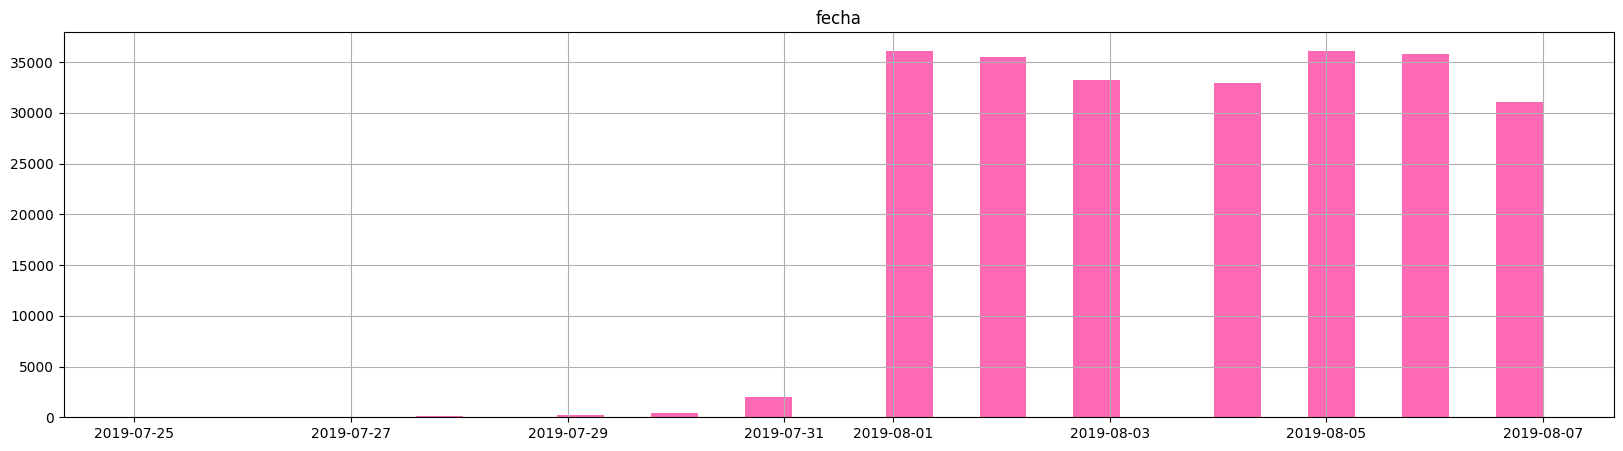

In [24]:
#Traza un histograma por fecha y hora. 

data.hist(column="fecha", bins=30, color="hotpink", figsize=[20,5])
plt.show()

In [25]:
#¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? 
#Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas 
#y esto podría sesgar el panorama general. 
#Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior.
fildata=data[data["fecha"]>="2019-08-01"]
fildata


,evento,userid,hora,grupo,fecha_y_hora,fecha
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


**¿Qué periodo representan realmente los datos?**

Nuestros datos representan únicamente un perido de 12 días, de los cuales eliminaremos los primeros 5, ya que no nos otorgan una cantidad significativa de datos completos.

In [26]:
#¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

total_users2=fildata.agg({"userid":"nunique"})
total_users2

userid    7534
dtype: int64

In [27]:
final_users=total_users - total_users2
final_users

userid    17
dtype: int64

In [28]:
#Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.
print(fildata.groupby("grupo").agg({"userid":"nunique"}))

       userid
grupo        
246      2484
247      2513
248      2537


# Estudiar el embudo de eventos

Ahora observaremos los resultados de un test A/A/B. 

Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios y las usuarias piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

Es importante tener en cuenta: los usuarios se dividen en 3 grupos: 

-2 grupos de control obtienen las fuentes antiguas.

-1 grupo de prueba obtiene el nuevo diseño. 

Nuestra tarea es descubrir qué conjunto de fuentes produce mejores resultados.

In [29]:
#Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

event_count=fildata.groupby("evento").agg({"userid":"count"}) #agrupa por evento, se cuenta el número de ocasiones que se repite
print(event_count.sort_values(by="userid", ascending=False)) #muestra y ordena forma descentente


                         userid
evento                         
MainScreenAppear         117328
OffersScreenAppear        46333
CartScreenAppear          42303
PaymentScreenSuccessful   33918
Tutorial                   1005


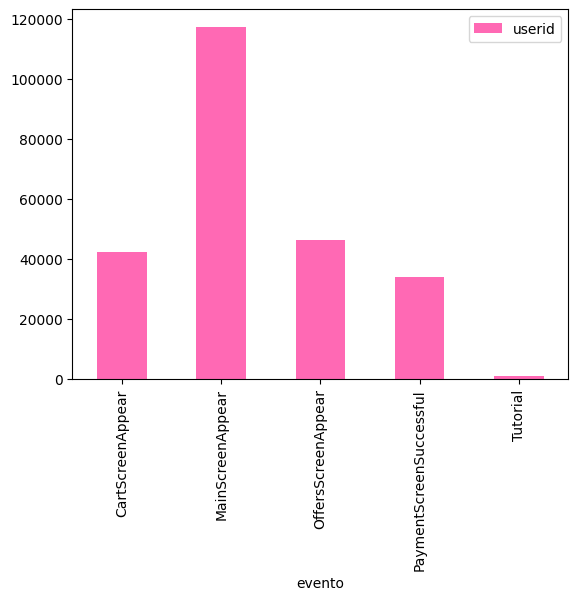

In [30]:
#graficar resultados
event_count.plot(kind="bar", color="hotpink", label="Total de usuarios")

plt.show()

In [31]:
#Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. 
#Ordena los eventos por el número de usuarios y usuarias. 

users_per_event_count=fildata.groupby("evento").agg({"userid":"nunique"})
print(users_per_event_count.sort_values(by="userid", ascending=False))


                         userid
evento                         
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840


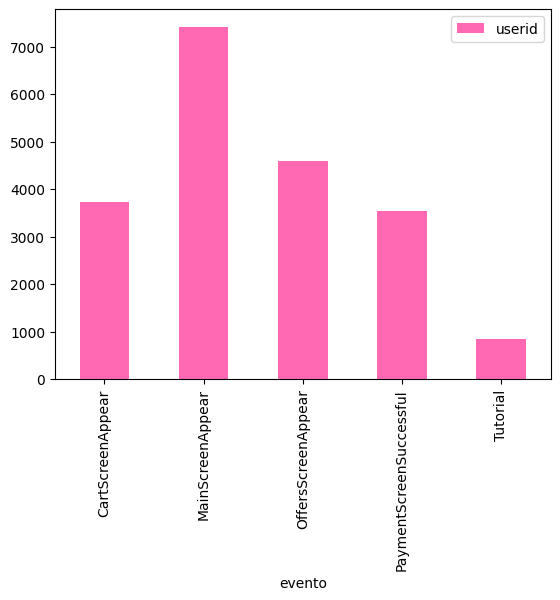

In [32]:
#graficar resultados
users_per_event_count.plot(kind="bar", color="hotpink", label="Total de usuarios")

plt.show()

In [33]:
#¿En qué orden crees que ocurrieron las acciones? 
#¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

print(users_per_event_count.sort_values(by="userid", ascending=False))

                         userid
evento                         
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840


In [34]:
#crea una cohorte con la 1er fecha de cada acción de los usuarios
users = fildata.pivot_table(
    index='userid', 
    columns='evento', 
    values='fecha',
    aggfunc='min')
print(users.head())

evento           CartScreenAppear MainScreenAppear OffersScreenAppear  \
userid                                                                  
6888746892508752              NaT       2019-08-06                NaT   
6909561520679493       2019-08-06       2019-08-06         2019-08-06   
6922444491712477       2019-08-04       2019-08-04         2019-08-04   
7435777799948366              NaT       2019-08-05                NaT   
7702139951469979       2019-08-02       2019-08-01         2019-08-01   

evento           PaymentScreenSuccessful Tutorial  
userid                                             
6888746892508752                     NaT      NaT  
6909561520679493              2019-08-06      NaT  
6922444491712477              2019-08-04      NaT  
7435777799948366                     NaT      NaT  
7702139951469979              2019-08-02      NaT  


In [35]:
#se busca encontrar el orden que se cree siguen los usuarios
step_1 = ~users['MainScreenAppear'].isna()
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])
step_5 = step_3 & (users['Tutorial'] > users['PaymentScreenSuccessful'])

n_pageview = users[step_1].shape[0]
n_offers = users[step_2].shape[0]
n_checkout = users[step_3].shape[0]
n_payment = users[step_4].shape[0]
n_tutorial = users[step_5].shape[0]

print('Visitantes:', n_pageview)
print('Vio ofertas:', n_offers)
print('Carrito de pago:', n_checkout)
print('Pagado:', n_payment)
print('Tutorial:', n_tutorial)

Visitantes: 7419
Vio ofertas: 688
Carrito de pago: 33
Pagado: 1
Tutorial: 0


In [36]:
#Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. 

#visualiza data a usar y se resetea el indice para su uso
users_per_event_count= users_per_event_count.sort_values(by="userid", ascending=False).reset_index()
users_per_event_count

,evento,userid
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [37]:
#se crea una columna con los valores anteriores para sacar el porcentaje usando shift
users_per_event_count["valor_anterior"]=users_per_event_count["userid"].shift(1)
users_per_event_count

,evento,userid,valor_anterior
0,MainScreenAppear,7419,NaN
1,OffersScreenAppear,4593,7419.0
2,CartScreenAppear,3734,4593.0
3,PaymentScreenSuccessful,3539,3734.0
4,Tutorial,840,3539.0


In [38]:
#cera la formula para calcular el % de conversion entre etapas
users_per_event_count["conversion_siguiente_etapa"] = (users_per_event_count["userid"]* 100) /users_per_event_count["valor_anterior"]

users_per_event_count

,evento,userid,valor_anterior,conversion_siguiente_etapa
0,MainScreenAppear,7419,NaN,NaN
1,OffersScreenAppear,4593,7419.0,61.908613
2,CartScreenAppear,3734,4593.0,81.297627
3,PaymentScreenSuccessful,3539,3734.0,94.777718
4,Tutorial,840,3539.0,23.735519


**Valor Nan en el primer dato corresponden al 100% de nuestros usuarios**

**¿En qué etapa pierdes más usuarios y usuarias?**

La mayor cantidad de usuarios se pierde en la última etapa del proceso, ya que al hacer el pago el 76% de los clientes no concretan este paso.

El segundo punto importnte de perdida de clientes es el 1er paso, perdiendo un 38% (del 100% al 62%) en el momento que las ofertas son mostrada.


Si hablamos de conversión de etapas nuestro problema esta en el pago, debemos considerar si los precios no son del agrado de los usuarios o porque en esa etapa se pierden tantos usuarios, si existe ulguna falla en la plataforma, ya que el interes de los usuarios existe, pero muy poco porcentaje lográ comprar los productos.

In [39]:
#¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?
#sacar conversion total
users_per_event_count["conversion_total"] = (users_per_event_count["userid"]* 100) /7419

users_per_event_count

,evento,userid,valor_anterior,conversion_siguiente_etapa,conversion_total
0,MainScreenAppear,7419,NaN,NaN,100.000000
1,OffersScreenAppear,4593,7419.0,61.908613,61.908613
2,CartScreenAppear,3734,4593.0,81.297627,50.330233
3,PaymentScreenSuccessful,3539,3734.0,94.777718,47.701847
4,Tutorial,840,3539.0,23.735519,11.322281


**¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?**

Solo el 11.32% de nuestros usuarios finalizan el proceso de compra.

# Resultados del experimento

In [40]:
#¿Cuántos usuarios y usuarias hay en cada grupo?

#agrupa por evento, se cuenta el número de usuarios únicos por grupo
group_count=fildata.groupby("grupo").agg({"userid":"nunique"}).reset_index()
group_count


,grupo,userid
0,246,2484
1,247,2513
2,248,2537


In [43]:
#crear data para cada grupo 
data_246= fildata[fildata["grupo"]== 246] 
data_247=fildata[fildata["grupo"]== 247]
data_248=fildata[fildata["grupo"]== 248]


In [44]:
#se crean datas para cada grupo, agrupando por día y número total de usuarios para su analisis estadístico
count_246=data_246.groupby("evento").agg({"userid":"nunique"}).reset_index()
count_247=data_247.groupby("evento").agg({"userid":"nunique"}).reset_index()
count_248=data_248.groupby("fecha").agg({"userid":"nunique"}).reset_index()


In [45]:
count_246

,evento,userid
0,CartScreenAppear,1266
1,MainScreenAppear,2450
2,OffersScreenAppear,1542
3,PaymentScreenSuccessful,1200
4,Tutorial,278


In [46]:
#Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. 
#Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

alpha = 0.05 # nivel de significación

results_AA = st.ttest_ind(count_246["userid"], count_247["userid"])

bonferroni_alpha = alpha / 2 # 2 comparaciones realizadas

print('valor p para comparar los grupos 246 y 247: ', results_AA.pvalue)

if (results_AA.pvalue < bonferroni_alpha):
    print("Hipótesis nula rechazada para los grupos 246 y 247")
else:
    print("Hipótesis nula no rechazada para los grupos 246 y 247")


valor p para comparar los grupos 246 y 247:  0.9809573661651472
Hipótesis nula no rechazada para los grupos 246 y 247


**Ho= No existe una diferencia significativa entre ambos grupos**

In [47]:
#Selecciona el evento más popular. 
#En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. 

#filtra por evento al grupo 246 
popular_246=data_246.groupby("evento").agg({"userid":"nunique"}).sort_values(by="userid", ascending=False).reset_index()


#se crea una columna con los valores anteriores para sacar el porcentaje usando shift
popular_246["valor_anterior"]=popular_246["userid"].shift(1)

#regla de 3 para el %
popular_246["conversion_siguiente_etapa"] = (popular_246["userid"]* 100) /popular_246["valor_anterior"]

popular_246["conversion_total"] = (popular_246["userid"]* 100) /2450

popular_246

,evento,userid,valor_anterior,conversion_siguiente_etapa,conversion_total
0,MainScreenAppear,2450,NaN,NaN,100.000000
1,OffersScreenAppear,1542,2450.0,62.938776,62.938776
2,CartScreenAppear,1266,1542.0,82.101167,51.673469
3,PaymentScreenSuccessful,1200,1266.0,94.786730,48.979592
4,Tutorial,278,1200.0,23.166667,11.346939


In [48]:
#acciones más populares del grupo 247
popular_247=data_247.groupby("evento").agg({"userid":"nunique"}).sort_values(by="userid", ascending=False).reset_index()

#se crea una columna con los valores anteriores para sacar el porcentaje usando shift
popular_247["valor_anterior"]=popular_247["userid"].shift(1)

#regla de 3 para el %
popular_247["conversion_siguiente_etapa"] = (popular_247["userid"]* 100) /popular_247["valor_anterior"]

popular_247["conversion_total"] = (popular_247["userid"]* 100) /2476

popular_247

,evento,userid,valor_anterior,conversion_siguiente_etapa,conversion_total
0,MainScreenAppear,2476,NaN,NaN,100.000000
1,OffersScreenAppear,1520,2476.0,61.389338,61.389338
2,CartScreenAppear,1238,1520.0,81.447368,50.000000
3,PaymentScreenSuccessful,1158,1238.0,93.537964,46.768982
4,Tutorial,283,1158.0,24.438687,11.429725


In [49]:
#Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

#filtra por evento al grupo 248 
popular_248=data_248.groupby("evento").agg({"userid":"nunique"}).sort_values(by="userid", ascending=False).reset_index()


#se crea una columna con los valores anteriores para sacar el porcentaje usando shift
popular_248["valor_anterior"]=popular_248["userid"].shift(1)

#regla de 3 para el %
popular_248["conversion_siguiente_etapa"] = (popular_248["userid"]* 100) /popular_248["valor_anterior"]

popular_248["conversion_total"] = (popular_248["userid"]* 100) /2493

popular_248

,evento,userid,valor_anterior,conversion_siguiente_etapa,conversion_total
0,MainScreenAppear,2493,NaN,NaN,100.000000
1,OffersScreenAppear,1531,2493.0,61.411953,61.411953
2,CartScreenAppear,1230,1531.0,80.339647,49.338147
3,PaymentScreenSuccessful,1181,1230.0,96.016260,47.372643
4,Tutorial,279,1181.0,23.624047,11.191336


In [50]:
alpha = .05 # nivel de significación

results_246_247 = st.ttest_ind(popular_246["userid"], popular_247["userid"])

results_246_248 = st.ttest_ind(popular_246["userid"], popular_248["userid"])

results_247_248 = st.ttest_ind(popular_247["userid"], popular_248["userid"])

bonferroni_alpha = alpha / 3  # tres comparaciones realizadas

print('valor p para comparar los grupos 246 y 247: ', results_246_247.pvalue)
print('valor p para comparar los grupos 246 y 248: ', results_246_248.pvalue)
print('valor p para comparar los grupos 247 y 248: ', results_247_248.pvalue)

if (results_246_247.pvalue < bonferroni_alpha):
    print("Hipótesis nula rechazada para los grupos 246 y 247")
else:
    print("Hipótesis nula no rechazada para los grupos 246 y 247")

if (results_246_248.pvalue < bonferroni_alpha):
    print("Hipótesis nula rechazada para los grupos 246 y 248")
else:
    print("Hipótesis nula no rechazada para los grupos 246 y 248")

if (results_247_248.pvalue < bonferroni_alpha):
    print("Hipótesis nula rechazada para los grupos 247 y 248")
else:
    print("Hipótesis nula no rechazada para los grupos 247 y 248")

valor p para comparar los grupos 246 y 247:  0.9809573661651472
valor p para comparar los grupos 246 y 248:  0.9931630297368078
valor p para comparar los grupos 247 y 248:  0.9879505929915808
Hipótesis nula no rechazada para los grupos 246 y 247
Hipótesis nula no rechazada para los grupos 246 y 248
Hipótesis nula no rechazada para los grupos 247 y 248


**¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente?**

Se ha stablecido un nivel del 5% para la sifnificancia en el valor alpha.



De han realiado en total 3 pruebas de hipótesis estadísticas usando el método de bonferri para comparar el número de ususarios por grupo (246, 247 y 248 (grupo con los cambios en plpataforma)) en total.

Comparando si los datos recolectados mostraban algúna diferencia y podrían ser utilizados para comprobar el impacto de los cambios en nuestra plataforma.



In [51]:
# Se volverá a realizar las pruebas ahora con una signiicancia menor para ver si existen cambios.
alpha = .01 # nivel de significación

results_246_247 = st.ttest_ind(popular_246["userid"], popular_247["userid"])

results_246_248 = st.ttest_ind(popular_246["userid"], popular_248["userid"])

results_247_248 = st.ttest_ind(popular_247["userid"], popular_248["userid"])

bonferroni_alpha = alpha / 3  # tres comparaciones realizadas

print('valor p para comparar los grupos 246 y 247: ', results_246_247.pvalue)
print('valor p para comparar los grupos 246 y 248: ', results_246_248.pvalue)
print('valor p para comparar los grupos 247 y 248: ', results_247_248.pvalue)

if (results_246_247.pvalue < bonferroni_alpha):
    print("Hipótesis nula rechazada para los grupos 246 y 247")
else:
    print("Hipótesis nula no rechazada para los grupos 246 y 247")

if (results_246_248.pvalue < bonferroni_alpha):
    print("Hipótesis nula rechazada para los grupos 246 y 248")
else:
    print("Hipótesis nula no rechazada para los grupos 246 y 248")

if (results_247_248.pvalue < bonferroni_alpha):
    print("Hipótesis nula rechazada para los grupos 247 y 248")
else:
    print("Hipótesis nula no rechazada para los grupos 247 y 248")

valor p para comparar los grupos 246 y 247:  0.9809573661651472
valor p para comparar los grupos 246 y 248:  0.9931630297368078
valor p para comparar los grupos 247 y 248:  0.9879505929915808
Hipótesis nula no rechazada para los grupos 246 y 247
Hipótesis nula no rechazada para los grupos 246 y 248
Hipótesis nula no rechazada para los grupos 247 y 248


**¿Cuál debería ser el nivel de significación?**

Utilizando tanto el 1% como el 5% de valor alpha podemos observar que la comparación de los datas no muestran ningún cambio conforme a la decisión de No rechazar la hipótesis con los 3 grupos.

Entre menos rango de significancia tengamos menor probabilidad de un falso positivo tenemos lo que nos ayuda a tomar mejores decisiones como empresa con los cambios.

Conocemos que **Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso.**

# Conclusiones 

En nuestro trabajo descubrimos que tenemos 5 eventos registrado en la plataorma y el orden por interacciones de los usuarios con nuestra plataforma es:

-MainScreenAppear

-OffersScreenAppear	

-CartScreenAppear

-PaymentScreenSuccessful

-Tutorial

Inicialmente tuvimos un registro de 7551 usuarios dentro de los  grupos analizados, con un promedio de 32 clics por usuario a la hora de usar la plataforma.

Nuestro estudio tiene una longitud de solo 12 días dentro de los cuales, los primeros 5 fueron eliminados por falta de registros La fecha del estudio iba del 25-07-2019 al 07-08-2019. 
Para nuestro estudio se iniciaria a tomar en cuenta desde el 01-08-2019, teniendp solo5 días de recolección de información.
Al eliminar los 7 días solo se perdieron 17 usuarios (0.2% del total), dejando un total de 7 534 usuarios para este estudio.


En general sin importar el grupo analizado, tenemos que solo el 11% de nuestros usuarios que nos visitan.

Teniendo el mayor porcentaje de perdida de los clientes en el momento del pago y al inicio de ver las ofertas. Se necesita analizar que pasa que más del 76% de los clientes retenidos hasta esa etapa se pierden al momento del pago. Es interesante analizar si eiste algun problema con la plataforma que esta causando este problema (falla o falta de metodos de pago, etc).

Tanto los grupos 246 y 247 que se utilizaron para la prueba A/A al momento de anliaarlos no mostraron diferencias en sus clientes ni en su interacción con la plataforma, por lo cual nos confirmo que se podía realizar la prueba B con el cambio con menor probabilidad de fallo en los resultados.

Al analizar los 3 grupos No existe ninguna diferencia significativa que nos haga rechazar la H0, la cual plantea que si eisten diferencias con las plataformas.

Para esta prueba se compararon los 3 grupos con el uso de la fórmula de Bonferroni para poder comparar los 3 grupos y su impacto  con la prueba, buscando evitar falsos positivos.

Basado en los resultados los cambios en la plataforma no estan teniendo impactos considerables en las reaccione sy ventas de los usuarios. Es importante graficar los resultados y continuar con un analisis a mayor profundidad para poder tomar una decision definitiva, además de considerar que 5 días pueden ser pocos días para la prueba y una toma decisiva ante los cambios.